In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [ ]:
def WVMA_factor(df, n=30):
    """
    计算交易量加权的价格变化波动率因子 (WVMA)
    公式: Std(|Δclose| × volume, n) / (Mean(|Δclose| × volume, n) + 1e-12)
    
    参数:
    df: 包含OHLCV数据的DataFrame
    n: 滚动窗口大小 (默认20)
    """
    # 计算价格变化的绝对值 |close/close_prev - 1|
    price_chg = (df['close'] / df['close'].shift(1) - 1).abs()
    
    # 计算交易量加权的价格变化
    weighted_chg = price_chg * df['volume']
    
    # 计算滚动窗口内的标准差和均值
    std_dev = weighted_chg.rolling(n).std()
    mean_val = weighted_chg.rolling(n).mean()
    
    # 计算因子值 (加上1e-12防止除零错误)
    factor = std_dev / (mean_val + 1e-12)
    
    # # 把因子值转换成均值为0，标准差为1的形式
    # factor = (factor - factor.mean()) / factor.std()
    
    return factor

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.002034
   Rank_IC (Spearman): 0.006533
📊 信息比率:
   IR: -0.137767
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130745
   因子列: WVMA_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


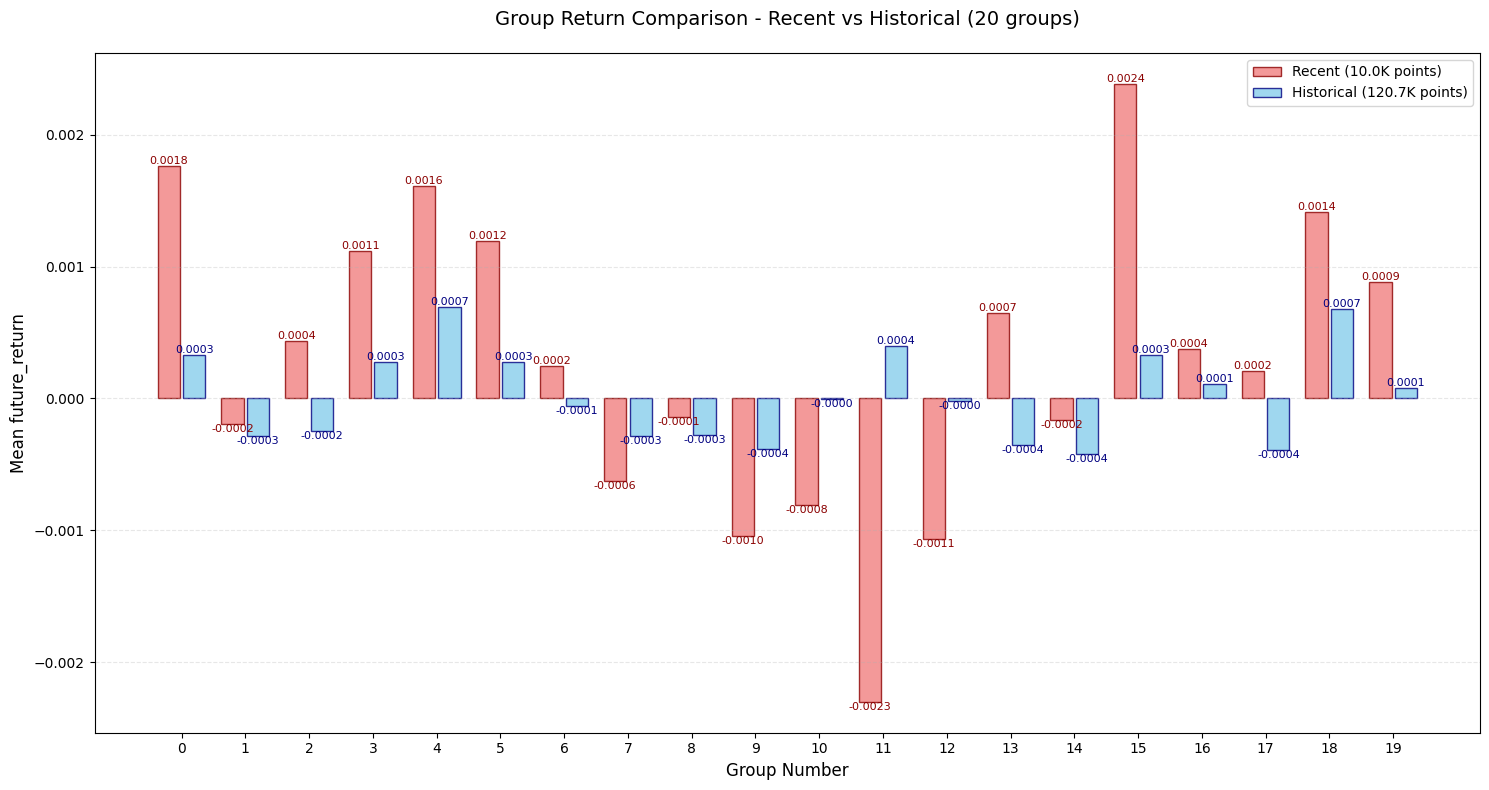

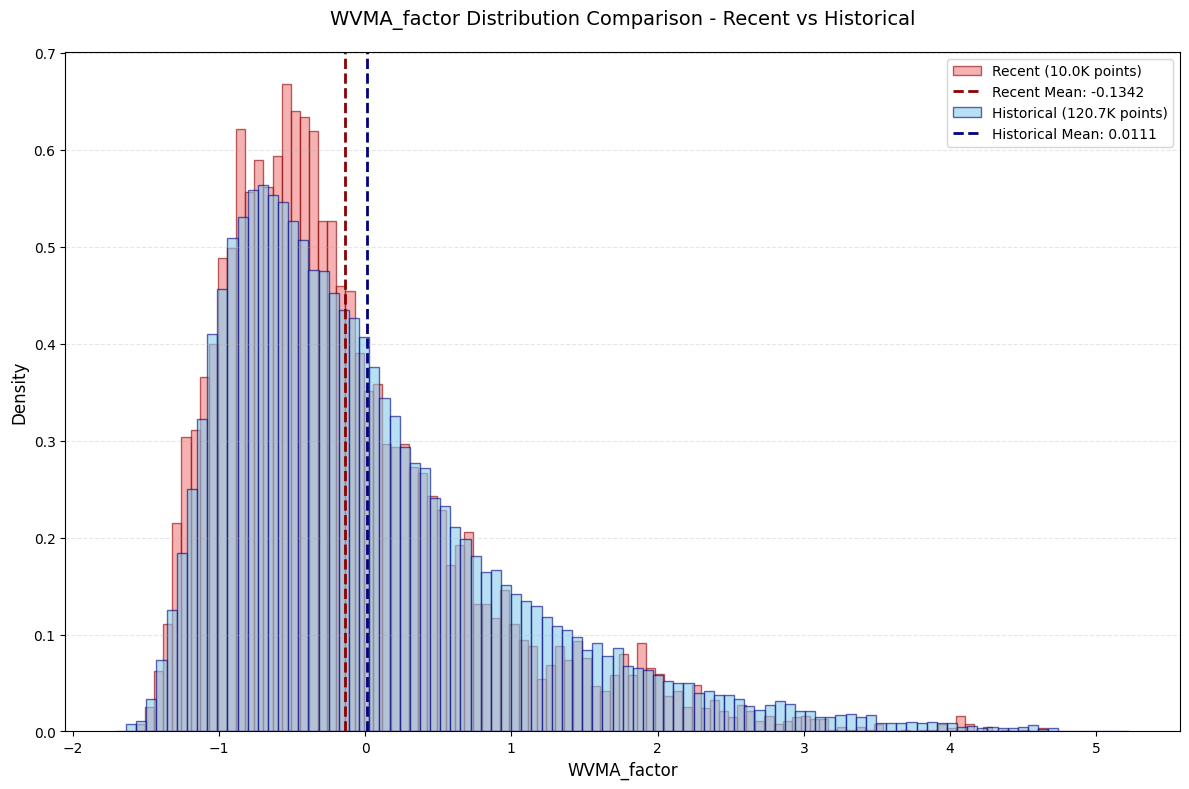

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [48]:
evaluator.set_factor(
    factor_func=WVMA_factor,
    factor_name='WVMA_factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

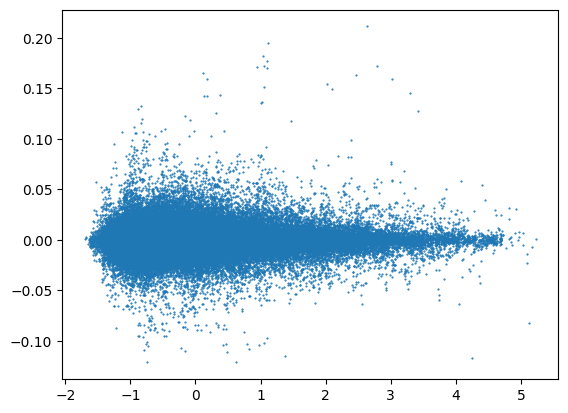

In [49]:
import matplotlib.pyplot as plt
plt.scatter(WVMA_factor(df),df['close'].pct_change(-10), s=0.3)

In [50]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.027620276135980875,
 0.023518688409988577,
 -0.01181372642298619,
 -0.015008568527564851,
 -0.0033557553979232714,
 0.019388082794214292,
 -0.015067204751241367,
 0.029067667813927858,
 -0.008500165932752374,
 -0.016028422908304096]

In [51]:
print(result)

{'correlation_analysis': {'IC': 0.0020338851614606105, 'Rank_IC': 0.006533069956469249}, 'information_ratio': {'IR': -0.1377667291260065, 'group_correlations': [-0.027620276135980875, 0.023518688409988577, -0.01181372642298619, -0.015008568527564851, -0.0033557553979232714, 0.019388082794214292, -0.015067204751241367, 0.029067667813927858, -0.008500165932752374, -0.016028422908304096], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -1.7035  -1.1433   -1.2668       0.0005      0.0107   6538
1      -1.1433  -1.0085   -1.0712      -0.0003      0.0116   6537
2      -1.0084  -0.9037   -0.9544      -0.0001      0.0122   6537
3      -0.9037  -0.8086   -0.8553       0.0004      0.0118   6537
4      -0.8086  -0.7187   -0.7641       0.0007      0.0124   6538
5      -0.7187  -0.6312   -0.6750       0.0004      0.0113   6537
6      -0.6312  -0.5405   -0.585